# 1. Single csv analysis:

Use the Pandas library in Python to read each CSV file into a DataFrame.
Concatenate or merge these DataFrames into a single DataFrame.


In [1]:
import re
def get_region_and_field(file_name):
    # Get region
    region = re.search('Institutions_(.*?)_', file_name).group(1)
    # Get field
    field = re.search('_(.*?)\.csv', file_name).group(1).split('_')[-1]
    return region, field

In [2]:

def make_unique(df # dataframe
                , col_name # column name to make unique
                ):
    for i, ab in enumerate(df[col_name]):
        cnt = df[col_name].to_list().count(ab)
        if cnt > 1:
            df[col_name][i] = ab + '-'+ str(cnt)



## Make dataframes for each csv file

In [3]:
import pandas as pd
import glob

# Read all CSV files into DataFrames
all_files = glob.glob('..\detailed\Institutions_*_*.csv')
df_list = []
for file in all_files:
    region, field = get_region_and_field(file)
    df = pd.read_csv(file)
    df['region'] = region
    df['field'] = field
    df_list.append(df)
# df_list = [pd.read_csv(file) for file in all_files]
for df in df_list:
    df['abbr'] = df['University'].apply(lambda name: ''.join(word[0] for word in name.split() if word[0].isupper()))
    make_unique(df, 'abbr')
    df['Standardized Faculty Count'] = (df['Faculty Count'] - df['Faculty Count'].mean()) / df['Faculty Count'].std()
    df['Standardized Publication Count'] = (df['Publication Count'] - df['Publication Count'].mean()) / df['Publication Count'].std()
    df['Discrepancy'] = df['Standardized Faculty Count'] - df['Standardized Publication Count']


# Concatenate DataFrames into a single DataFrame
# combined_df = pd.concat(df_list, ignore_index=True)

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_16664\475380223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][i] = ab + '-'+ str(cnt)
C:\Users\Benjamin\AppData\Local\Temp\ipykernel_16664\475380223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][i] = ab + '-'+ str(cnt)
C:\Users\Benjamin\AppData\Local\Temp\ipykernel_16664\475380223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][i] = ab

In [4]:
print(df_list[0])

    Rank                       University  Faculty Count  Publication Count  \
0      1            University of Toronto             57               24.0   
1      2           University of Waterloo             45               20.0   
2      3            University of Alberta             36               16.3   
3      4   University of British Columbia             29               13.2   
4      5           University of Montreal             20               12.0   
5      6          Simon Fraser University             32               11.6   
6      7                McGill University             15                5.6   
7      8                  York University             12                4.5   
8      9              Carleton University              5                3.6   
9      9             University of Ottawa              9                3.6   
10    11                 Université Laval             12                3.3   
11    12                     ETS Montreal           

In [10]:
def make_unique_abbr(df):
    dupli_index = 1
    res_list = []
    for i, ab in enumerate(df['abbr']):
        cnt = df['abbr'].to_list().count(ab)
        if cnt > 1:
            df['abbr'][i] = ab + '_'+ str(cnt)

## Single attribute analysis

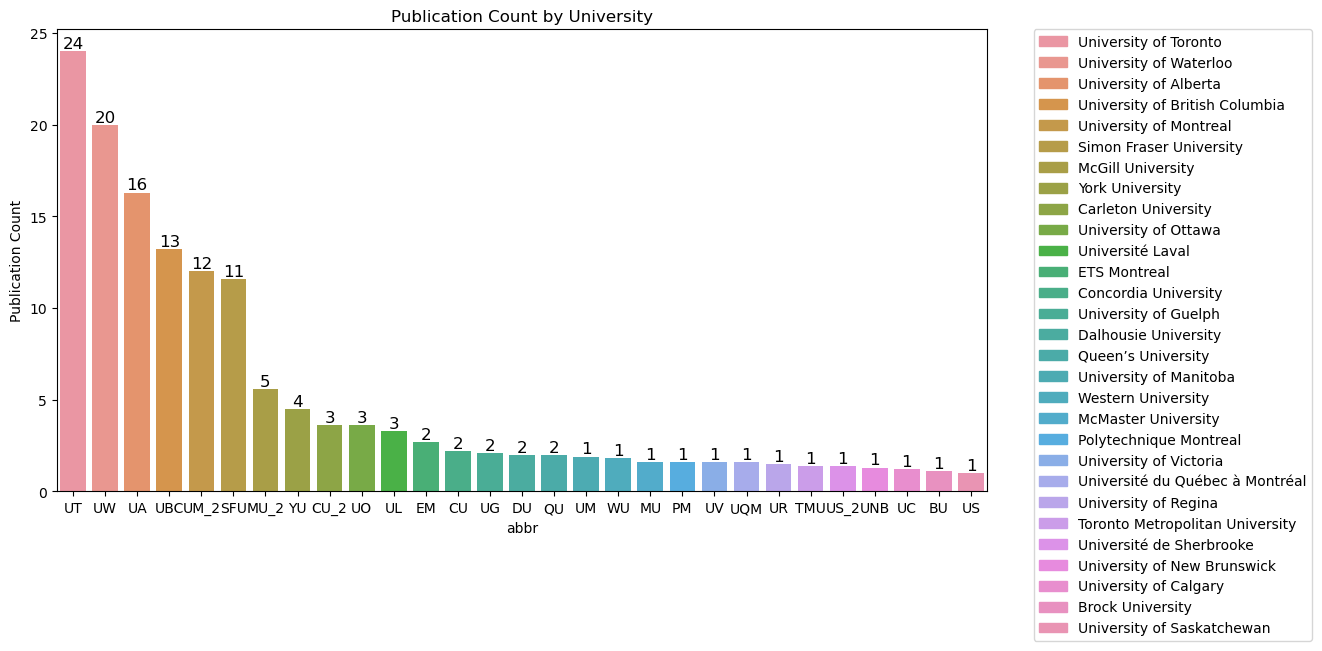

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df is your DataFrame and it has been defined

# plt.figure(figsize=(12,6))
# ax = sns.barplot(x='abbr', y='Publication Count', data=df_list[0])
# plt.title('Publication Count by University')

# # Get the unique abbreviations and corresponding university names
# abbr_names = df_list[0][['abbr', 'University']]

# # Create a legend
# patches = [mpatches.Patch(color=ax.patches[i].get_facecolor(), label=label) for i, label in enumerate(abbr_names['University'])]

# # Add a legend to the plot
# # bbox_to_anchor=(1.05, 1) places the legend outside of the plot area on the right side
# # loc=2 places the legend at the top left corner of the legend bounding box
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.show()

plt.figure(figsize=(12,6))
ax = sns.barplot(x='abbr', y='Publication Count', data=df_list[0])
plt.title('Publication Count by University')

# Get the unique abbreviations and corresponding university names
abbr_names = df_list[0][['abbr', 'University']]

# Create a legend
patches = [mpatches.Patch(color=ax.patches[i].get_facecolor(), label=label) for i, label in enumerate(abbr_names['University'])]

# Add a legend to the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Add the exact number on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

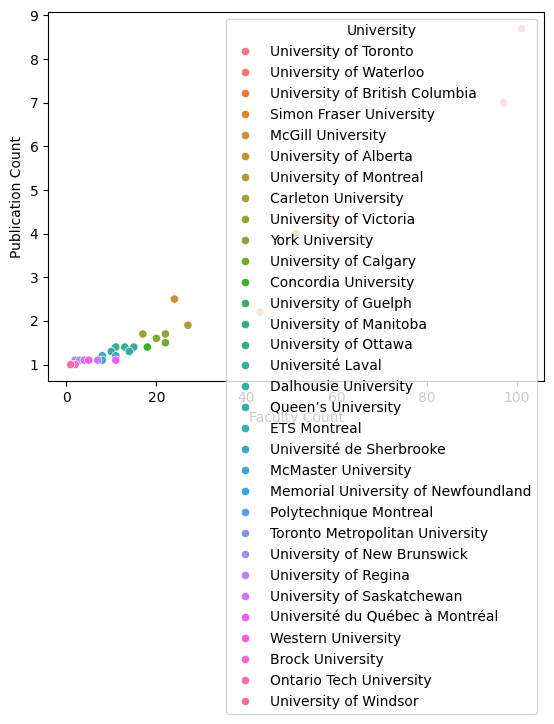

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Faculty Count', y='Publication Count', hue='University', data=combined_df)
plt.show()


# 4. Interactive Dashboards:

Create interactive dashboards using tools like Dash (by Plotly) or Tableau.
Dash allows you to create web-based applications with interactive visualizations.
Example (using Dash for an interactive scatter plot):

In [5]:
df_list[0]

,Rank,University,Faculty Count,Publication Count,region,field,abbr,Standardized Faculty Count,Standardized Publication Count,Discrepancy
0,1,University of Toronto,57,24.0,CND,ai,UT,3.145628,3.038960,0.106668
1,2,University of Waterloo,45,20.0,CND,ai,UW,2.307436,2.396028,-0.088592
2,3,University of Alberta,36,16.3,CND,ai,UA,1.678792,1.801317,-0.122524
3,4,University of British Columbia,29,13.2,CND,ai,UBC,1.189847,1.303045,-0.113198
4,5,University of Montreal,20,12.0,CND,ai,UM-2,0.561203,1.110165,-0.548962
5,6,Simon Fraser University,32,11.6,CND,ai,SFU,1.399395,1.045872,0.353523
6,7,McGill University,15,5.6,CND,ai,MU-2,0.211957,0.081475,0.130482
7,8,York University,12,4.5,CND,ai,YU,0.002409,-0.095331,0.097740
8,9,Carleton University,5,3.6,CND,ai,CU-2,-0.486537,-0.239991,-0.246546
9,9,University of Ottawa,9,3.6,CND,ai,UO,-0.207139,-0.239991,0.032851


In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Assuming df is your DataFrame
app = dash.Dash(__name__)

# Bar chart
bar_chart = px.bar(df_list[0], x='abbr', y='Discrepancy', title='Differences (standardized_Fac - standardized_Pub)')

# Line chart with hover feature
line_chart = px.line(df_list[0], x='abbr', y=['Standardized Faculty Count', 'Standardized Publication Count'], title='Standardized Faculty Count and Standardized Publication Count', hover_data=['Faculty Count', 'Publication Count'])

# Layout
app.layout = html.Div([
    dcc.Graph(figure=bar_chart),
    dcc.Graph(figure=line_chart)
])

if __name__ == '__main__':
    app.run_server(debug=True)



C:\Users\Benjamin\AppData\Local\Temp\ipykernel_16664\2917364056.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Benjamin\AppData\Local\Temp\ipykernel_16664\2917364056.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [9]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
from bokeh.palettes import Spectral11

# Assuming df is your DataFrame
source = ColumnDataSource(df_list[0])

# Bar chart
bar_chart = figure(x_range=df_list[0]['abbr'], height=400, title='Differences (standardized_Fac - standardized_Pub)')
bar_chart.vbar(x='abbr', top='Discrepancy', width=0.9, source=source, line_color='white', fill_color=Spectral11[0])

# Line chart with hover tool
line_chart = figure(x_range=df['abbr'], height=400, title='Standardized Faculty Count and Standardized Publication Count', tools='hover', tooltips=[('Standardized Faculty Count', '@Standardized_Faculty_Count'), ('Standardized Publication Count', '@Standardized_Publication_Count'), ('Faculty Count', '@Faculty_Count'), ('Publication_Count', '@Publication_Count')])
line_chart.line(x='abbr', y='Standardized Faculty Count', line_width=2, line_color=Spectral11[1], legend_label='Standardized Faculty Count', source=source)
line_chart.line(x='abbr', y='Standardized Publication Count', line_width=2, line_color=Spectral11[2], legend_label='Standardized Publication Count', source=source)

# Display the plots
show(column(bar_chart, line_chart))

"""
app = dash.Dash(__name__)

# Bar chart
bar_chart = px.bar(df_list[0], x='abbr', y='Discrepancy', title='Differences (standardized_Fac - standardized_Pub)')

# Line chart with hover feature
line_chart = px.line(df_list[0], x='abbr', y=['Standardized Faculty Count', 'Standardized Publication Count'], title='Standardized Faculty Count and Standardized Publication Count', hover_data=['Faculty Count', 'Publication Count'])

# Layout
app.layout = html.Div([
    dcc.Graph(figure=bar_chart),
    dcc.Graph(figure=line_chart)
])

if __name__ == '__main__':
    app.run_server(debug=True)
"""


"\napp = dash.Dash(__name__)\n\n# Bar chart\nbar_chart = px.bar(df_list[0], x='abbr', y='Discrepancy', title='Differences (standardized_Fac - standardized_Pub)')\n\n# Line chart with hover feature\nline_chart = px.line(df_list[0], x='abbr', y=['Standardized Faculty Count', 'Standardized Publication Count'], title='Standardized Faculty Count and Standardized Publication Count', hover_data=['Faculty Count', 'Publication Count'])\n\n# Layout\napp.layout = html.Div([\n    dcc.Graph(figure=bar_chart),\n    dcc.Graph(figure=line_chart)\n])\n\nif __name__ == '__main__':\n    app.run_server(debug=True)\n"

# 4. Geospatial Visualization:

visualize the world case here. However, the package has been tested on local machine and hit some connection error related to proxy issues. Therefore, the code segment is run on google colab and github codespace instead.

In [ ]:
import folium
from geopy.geocoders import Nominatim

# Example DataFrame with university names
idk = pd.DataFrame({'University': ['Carnegie Mellon University', 'Purdue University', 'KAIST']})

# Initialize a Folium map centered at a specific location
map_center = [0, 0]  # Center of the map, adjust as needed
my_map = folium.Map(location=map_center, zoom_start=2)

# Geocode and add markers for each university
geolocator = Nominatim(user_agent="my_geocoder")

for university in idk['University']:
    location = geolocator.geocode(university)
    
    # Check if geocoding was successful
    if location:
        folium.Marker([location.latitude, location.longitude], popup=university).add_to(my_map)
    else:
        print(f"Could not find coordinates for {university}")

# Save the map to an HTML file
my_map.save('universities_map.html')


### Print world map

The lan and lon data are collected with geolocator.

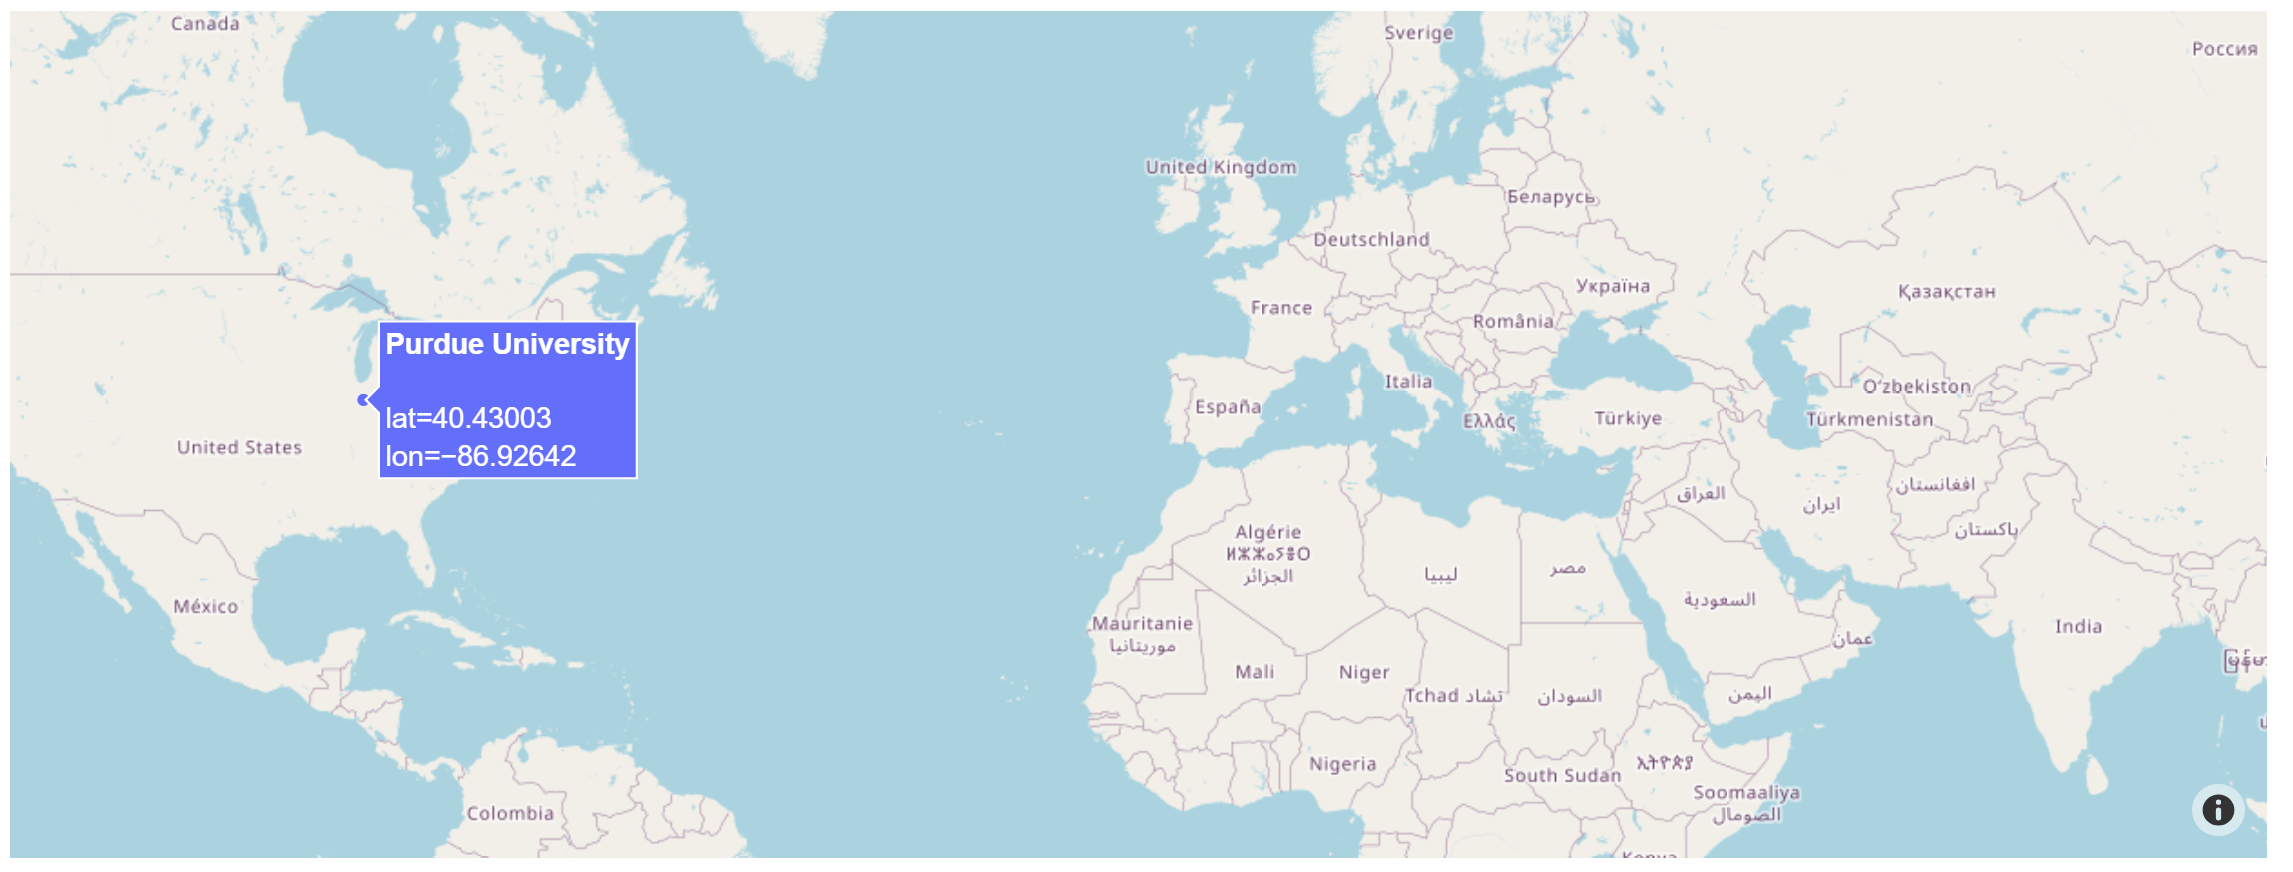

In [ ]:
import plotly.express as px

# Example DataFrame with university names
df = pd.DataFrame({'University': ['Carnegie Mellon University', 'Purdue University', 'KAIST']})

# Geocode universities using Nominatim
geolocator = Nominatim(user_agent="my_geocoder")
df['location'] = df['University'].apply(lambda x: geolocator.geocode(x) if geolocator.geocode(x) else None)

# Extract latitude and longitude from the location object
df['lat'] = df['location'].apply(lambda x: x.latitude if x else None)
df['lon'] = df['location'].apply(lambda x: x.longitude if x else None)

# Filter out rows with missing coordinates
df = df.dropna(subset=['lat', 'lon'])

# Create Mapbox map
fig = px.scatter_mapbox(df, lat='lat', lon='lon', hover_name='University', zoom=2)

# Specify Mapbox style (you'll need a Mapbox token)
fig.update_layout(mapbox_style="open-street-map", mapbox_accesstoken="YOUR_MAPBOX_TOKEN")

# Show the map
fig.show()

### With interfaces to switch between different fields

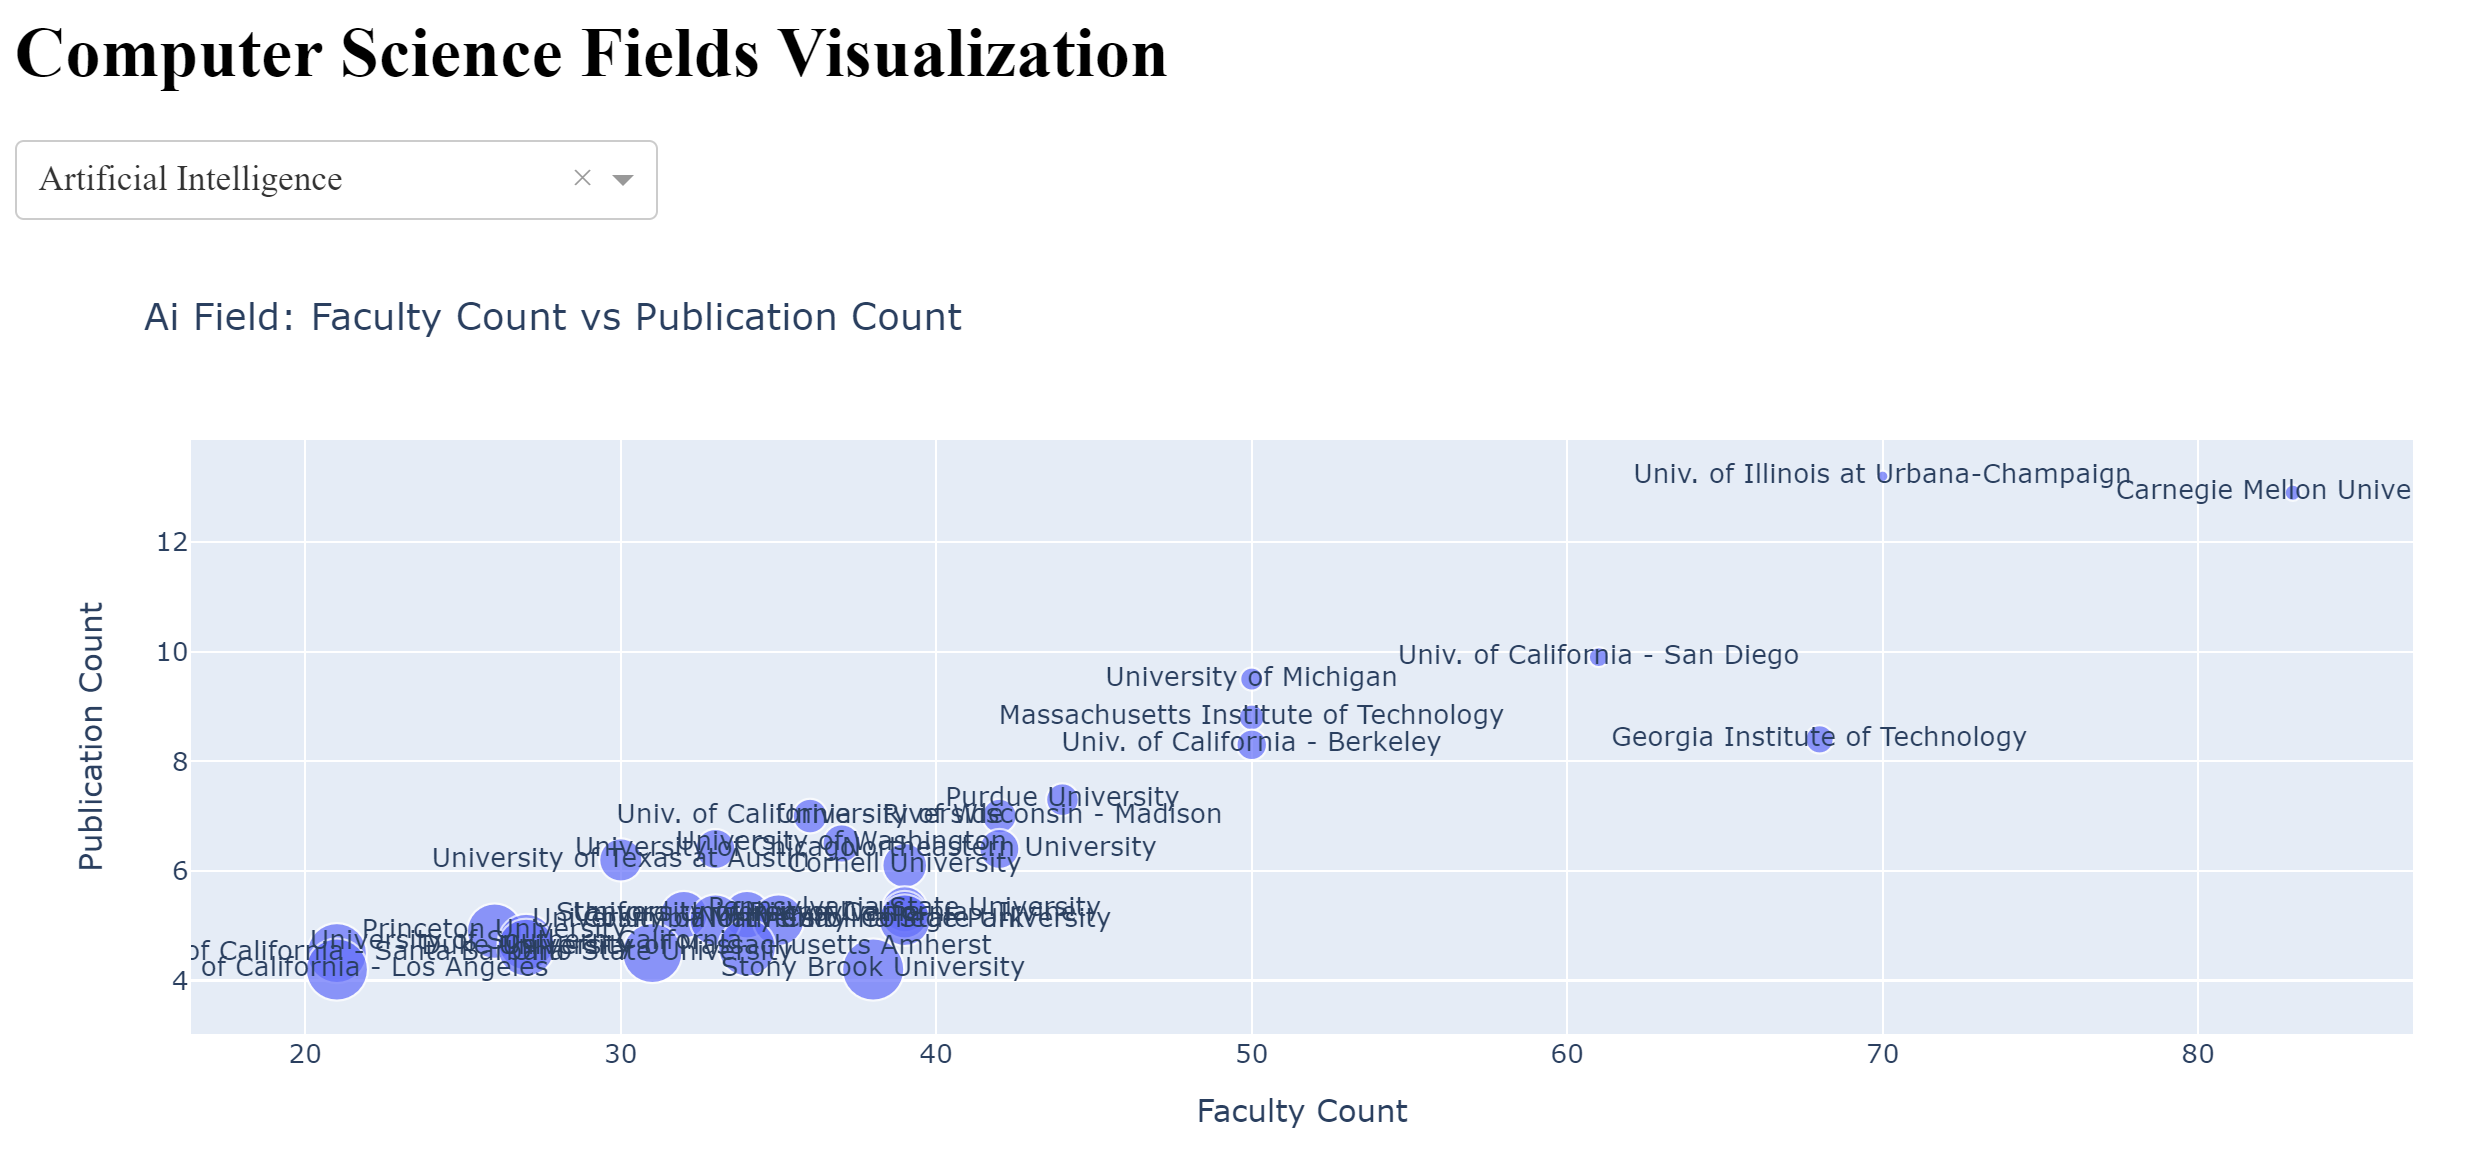

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd


# Load your CSV data
df_ai = pd.read_csv('Institutions_USA_sys.csv')  # Replace with your actual file path
df_network = pd.read_csv('Institutions_WORLD_all.csv')  # Replace with your actual file path

# Dash app initialization
app = dash.Dash(__name__)

# Dash app layout
app.layout = html.Div([
    html.H1("Computer Science Fields Visualization"),

    dcc.Dropdown(
        id='field-dropdown',
        options=[
            {'label': 'Artificial Intelligence', 'value': 'ai'},
            {'label': 'Networks', 'value': 'network'},
            # Add more fields as needed
        ],
        value='ai',  # Default selected field
        style={'width': '50%'}
    ),

    dcc.Graph(id='field-visualization')
])

# Dash app callback to update the graph based on the selected field
@app.callback(
    Output('field-visualization', 'figure'),
    [Input('field-dropdown', 'value')]
)
def update_graph(selected_field):
    # Select the appropriate DataFrame based on the selected field
    selected_df = df_ai if selected_field == 'ai' else df_network  # Add more conditions as needed

    # Create a Plotly Express scatter plot
    fig = px.scatter(
        selected_df,
        x='Faculty Count',
        y='Publication Count',
        size='Rank',  # Adjust based on your data
        text='University',
        title=f'{selected_field.capitalize()} Field: Faculty Count vs Publication Count',
        labels={'Faculty Count': 'Faculty Count', 'Publication Count': 'Publication Count'},
        hover_data=['University']
    )

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


### Heat map in the world

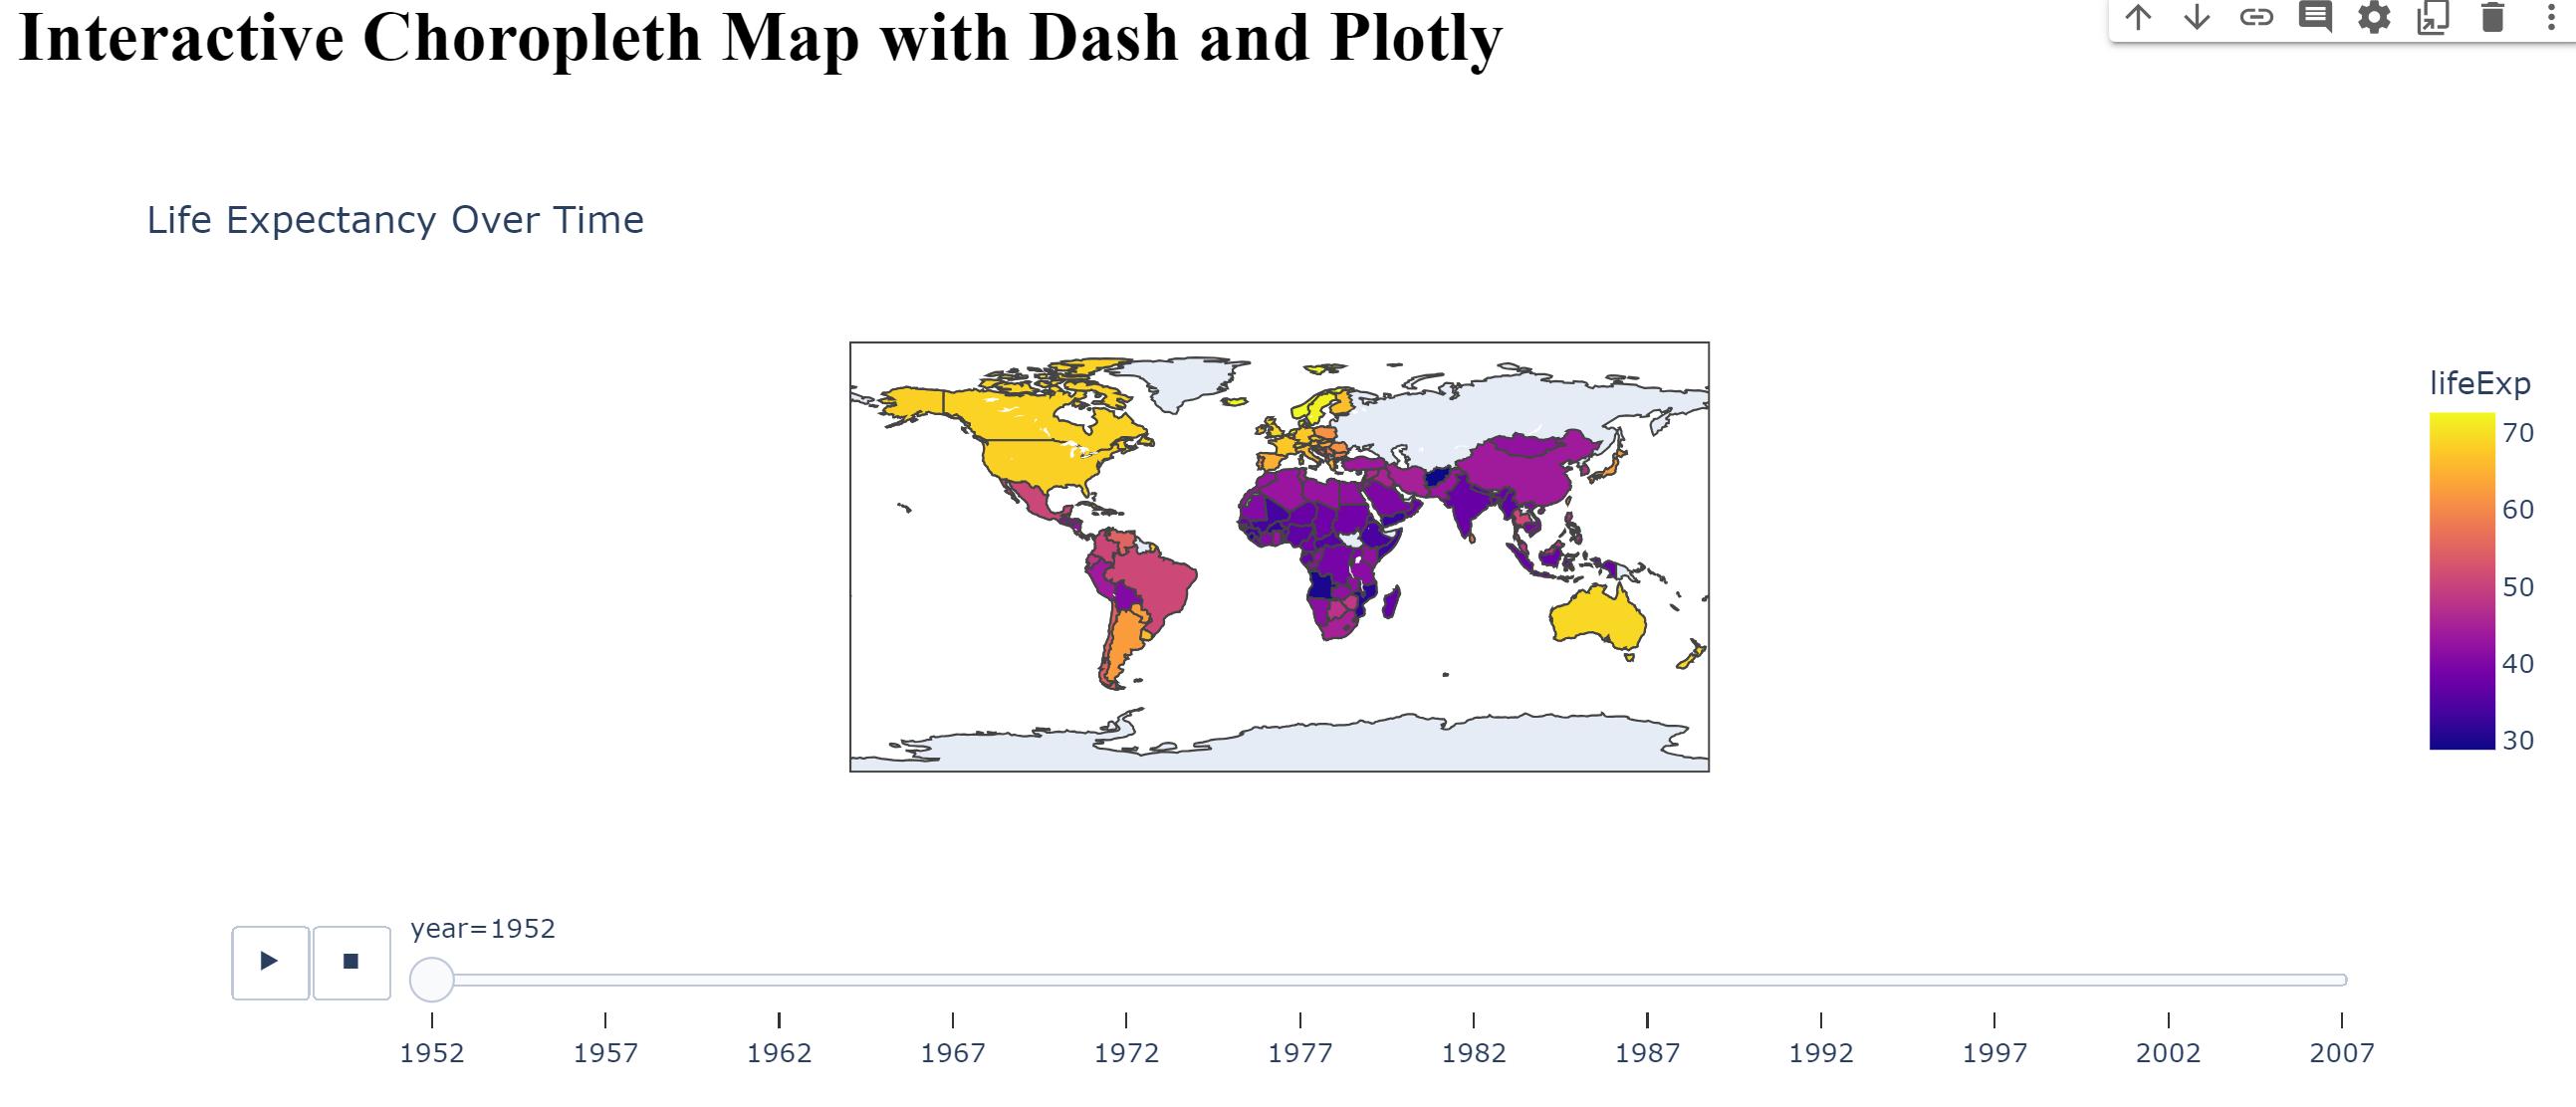

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Sample data for choropleth map
data = px.data.gapminder()
fig = px.choropleth(data,
                    locations="iso_alpha",
                    color="lifeExp",
                    hover_name="country",
                    animation_frame="year",
                    title="Life Expectancy Over Time")

# Dash app initialization
app = dash.Dash(__name__)

# Dash app layout
app.layout = html.Div([
    html.H1("Interactive Choropleth Map with Dash and Plotly"),

    dcc.Graph(figure=fig)  # Embed Plotly figure in Dash app
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

In [14]:
import plotly.express as px

# Example DataFrame with university names
df = pd.DataFrame({'University': ['Carnegie Mellon University', 'Purdue University', 'KAIST']})

# Geocode universities using Nominatim
geolocator = Nominatim(user_agent="my_geocoder")
df['location'] = df['University'].apply(lambda x: geolocator.geocode(x) if geolocator.geocode(x) else None)

# Extract latitude and longitude from the location object
df['lat'] = df['location'].apply(lambda x: x.latitude if x else None)
df['lon'] = df['location'].apply(lambda x: x.longitude if x else None)

# Filter out rows with missing coordinates
df = df.dropna(subset=['lat', 'lon'])

# Create Mapbox map
fig = px.scatter_mapbox(df, lat='lat', lon='lon', hover_name='University', zoom=2)

# Specify Mapbox style (you'll need a Mapbox token)
fig.update_layout(mapbox_style="open-street-map", mapbox_accesstoken="YOUR_MAPBOX_TOKEN")

# Show the map
fig.show()


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Carnegie+Mellon+University&format=json&limit=1 (Caused by ProxyError('Cannot connect to proxy.', FileNotFoundError(2, 'No such file or directory')))

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np

all_list = []

for index in range(len(df_list)):

    uni_list =  df_list[index]['University'].to_list()
    lat_list = df_list[index]['lat'].to_list()
    lat_list = [0 if np.isnan(x) else x for x in lat_list]
    lon_list = df_list[index]['lon'].to_list()
    lon_list = [0 if np.isnan(x) else x for x in lon_list]
    fac_list = df_list[index]['Faculty Count'].to_list()
    fac_list = [0 if np.isnan(x) else x for x in fac_list]
    pub_list = df_list[index]['Publication Count'].to_list()
    pub_list = [0 if np.isnan(x) else x for x in pub_list]

    # Sample data with latitude, longitude, faculty count, and publication count
    data = {
        'University': uni_list,
        'Latitude': lat_list,
        'Longitude': lon_list,
        'FacultyCount': fac_list,
        'PublicationCount': pub_list
    }

    df = pd.DataFrame(data)
    all_list.append(df)


# Dash app initialization
app = dash.Dash(__name__)

# Dash app layout
app.layout = html.Div([
    html.H1("World Map with Heat Maps for Faculty Count and Publication Count"),

    dcc.Dropdown(
        id = 'field-dropdown',
        options = [
            {'label': 'All', 'value': 0},
            {'label': 'Artificial Intelligence', 'value': 1},
            {'label': 'Networks', 'value': 2},
            {'label': 'Architecure', 'value': 3},
            {'label': 'Database', 'value': 4},
            {'label': 'HPC', 'value': 5},
            {'label': 'Metrics', 'value': 6},
            {'label': 'Operating System', 'value': 7},
            {'label': 'Other', 'value': 8},
            {'label': 'Programming Language', 'value': 9},
            {'label': 'System', 'value': 10},
            {'label': 'Theory', 'value': 11},
        ],
        value = 0,
        style = {'width': '50%'}
    ),
    dcc.Graph(id='world-map'),
])

# Dash app callback to update the map based on the selected field
@app.callback(
    Output('world-map', 'figure'),
    [Input('field-dropdown', 'value')]
)
def update_map(selected_field):

    selected_df = all_list[selected_field]
    fig = px.scatter_geo(selected_df, 
                         lat='Latitude', 
                         lon='Longitude', 
                         text='University', 
                         size='FacultyCount', 
                         color='PublicationCount')


    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

# 5. Cluster Analysis:

- Explore cluster analysis using algorithms like K-Means to identify patterns in the data.
- Example (using K-Means with scikit-learn):

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
combined_df['Cluster'] = kmeans.fit_predict(combined_df[['Faculty Count', 'Publication Count']])
